## Estimate the Completion Time of the Washing Cycle


Given that a new data with the respective parameters shown below were captured in the washing machine (see 'input1.csv' file):  

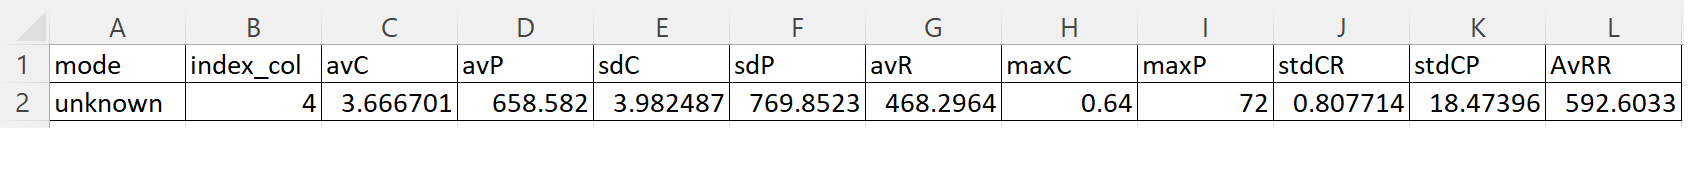

We shall use the predictive model trained earlier to predict the wash cycle, and estimate the time needed for the washing machine to complete the entire washing. The tasks to be executed are as follows: 

1. Load this new data from the 'new_data1.csv' file
2. Load the predictive model that produced the best evaluation result earlier
3. Predict the wash cycle from the 'best' model
4. Calculate the estimated time needed to wait before the sequence of washing is completed

***

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

In [ ]:
ROOT_DIR = '/content/drive/MyDrive/C379'

In [5]:
# Step 1: Input necessary Python libraries
import pandas as pd

# Loading the data from new input  
data_path  = ?? + '/data/input1.csv' 
currentdf  = pd.read_csv(data_path)

input1 = currentdf.iloc[:, 1:]
print (input1)

   index_col       avC      avP       sdC         sdP         avR  maxC  maxP  \
0          4  3.666701  658.582  3.982487  769.852323  468.296401  0.64    72   

      stdCR      stdCP       AvRR  
0  0.807714  18.473964  592.60328  


In [6]:
# Step 2: Load the predictive model that has produced the best result earlier
import pickle as pk

model_filename = ?? + "./model/??.mdl" # Replace ?? with your best model saved in the 'model' folder earlier
model = pk.load(open(model_filename, 'rb'))
print("Model loaded")

Model loaded


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [7]:
# Step 3: Predicting the wash cycle of the given new data 
mode = model.predict(input1)
print (mode[0])

CottonWash


Before estimating the completion time, let's understand the washing mode and it's sequence. As shown in the table below, there are 3 types of washing mode (Daily, Cotton & Bedding), 3 sequences of the washing cycle (Wash, Rinse & Spin) in each mode, and the total time steps needed to complete each washing sequence. 

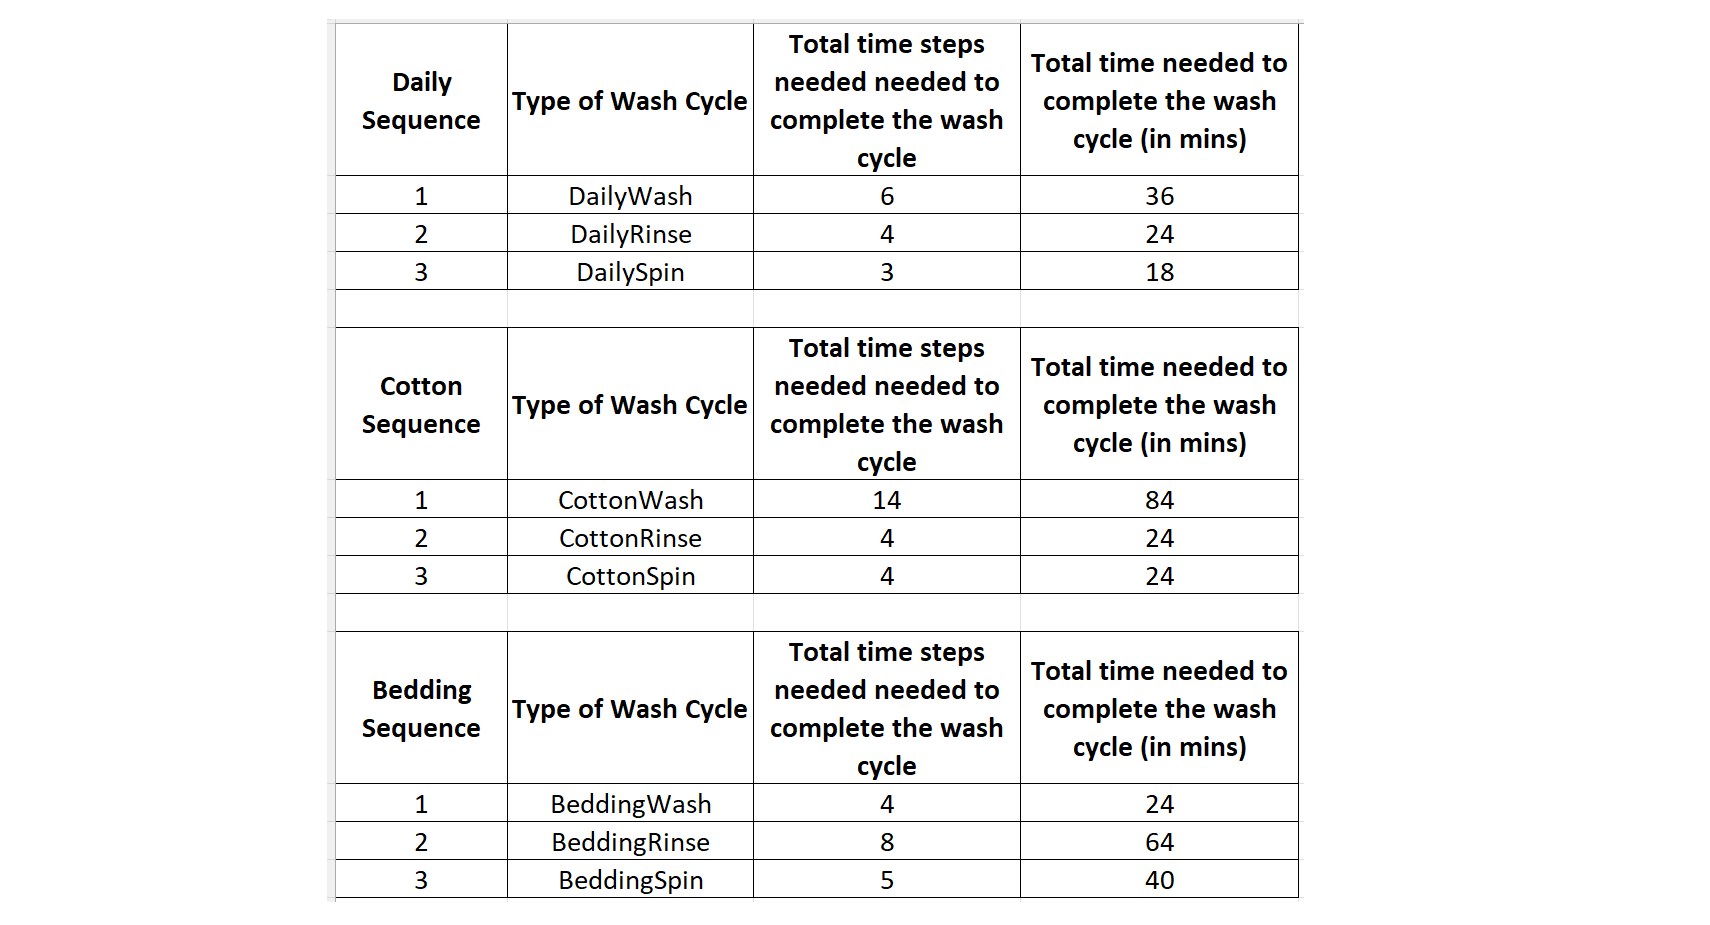

In the table above, assuming each time step required 6 minutes to complete. Hence, the total amount of time (in minutes) required to complete each wash sequence is calculated in the last column of the table. 


For the dataset shown below, the 'index_col' column in the CSV file indicates the time step in each wash cycle (see Column C). 

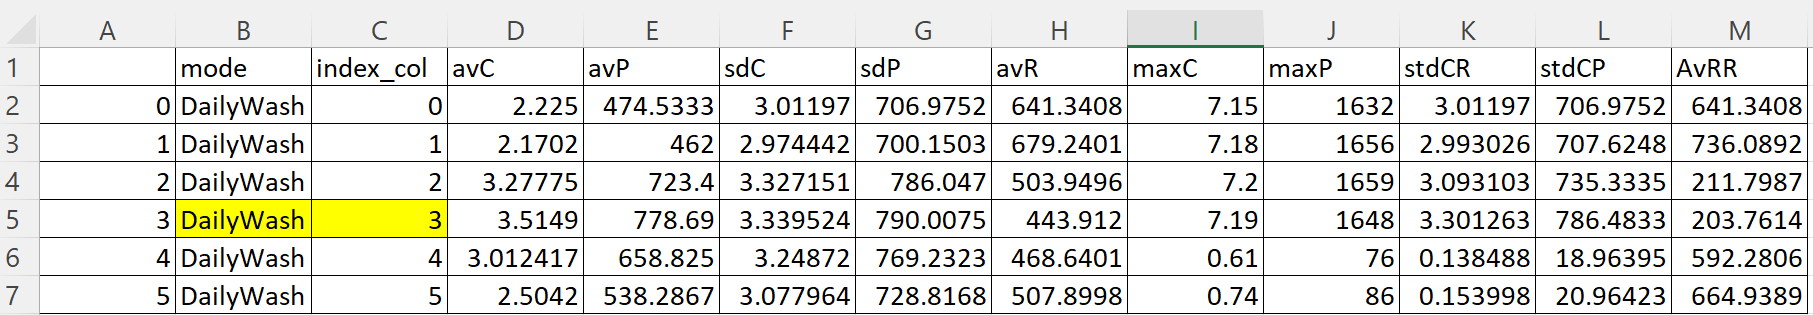

Given that each time step takes 6 minutes to complete, index_col = 3 implies that this specific wash cycle called 'CottonWash' has completed 3 * 6 =  18 minutes of washing. Hence, the estimate time to completion for this wash sequence is 84 - 18 = 66 minutes. And the estimated time to complete the entire cotton sequence is 66 + 24 + 24 = 114 minutes. That is how long the customer will need to wait before the washing is complete.  

Using the data from 'input1.csv' file, let's estimate the total time needed for the customer to wait before she can collect her laundry.
***

In [8]:
# Step 4: Calculate the estimated time needed to wait before the sequence of washing is completed

# From the 'new_input1.csv' file, extract the time step from dataframe 
t_step = input1.iloc[0][0]

# Detaermine the total time steps to complete the entire wash sequence
if mode == ('DailyWash' or 'DailyRaise' or 'DailySpin'):
    total_steps = 13
elif mode == ('CottonWash' or 'CottonRaise' or 'CottonSpin'):  
    total_steps = 22
else: 
    total_steps = 17
    
toc = (total_steps - t_step) * 6     
    
print ("Current wash cycle: " + mode[0])    
print ("Estimate time to completion: " + str(toc) + " mins.")

Current wash cycle: CottonWash
Estimate time to completion: 108.0 mins.


From the data collected in 'input2.csv' file, repeat $Step 4$ again to predict the wash cycle and the estimated time needed to complete the entire wash sequence.  


In [ ]:
# Insert your code here ....


Explore using different values in 'input2.csv' to predict the new wash cycle and the new estimated time to completion. 


In [ ]:
# Insert your code here ....


***